In [33]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = pd.read_csv('youtube-comments.csv')
df.shape

(892, 7)

In [34]:
df['has_link'] = 0
df['has_subscribe'] = 0
df['has_email'] = 0
df['has_phone'] = 0

word_list = ['subscribe', 'subcribe', 'subcrib', 'සබ්ස්']

for index, row in df.iterrows():
    if any(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', str(row['text_original']))):
        df.at[index, 'has_link'] = 1
    
    if any(re.findall(r'|'.join(word_list), str(row['text_original']), re.IGNORECASE)):
        df.at[index, 'has_subscribe'] = 1
        
    if any(re.findall(r'(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', str(row['text_original']))):
        df.at[index, 'has_email'] = 1
        
    if any(re.findall(r'[0-9]{7,}', str(row['text_original']))):
        df.at[index, 'has_phone'] = 1

df.head()

,id,video_id,comment_id,text_display,text_original,is_spam,checked,has_link,has_subscribe,has_email,has_phone
0,2,1z4ughaHFj4,UgyOqRur7XVuSZsC-uN4AaABAg,"<a href=""https://youtu.be/9XHO4W7_4UI"">https:/...",https://youtu.be/9XHO4W7_4UI,1,1,1,0,0,0
1,5,1z4ughaHFj4,UgwKDIi_qJwGP2U0rOx4AaABAg,ලස්සන්‍යි බන්...වීඩියො එක බලන්නෙ නෙ සින්දුව අහ...,ලස්සන්‍යි බන්...වීඩියො එක බලන්නෙ නෙ සින්දුව අහ...,0,1,0,0,0,0
2,6,1z4ughaHFj4,Ugyeu3pV4VglihhGiOh4AaABAg,????පව් කරලා වැඩක් නැ සිල් අරන්.....මම් යන්නම ...,????පව් කරලා වැඩක් නැ සිල් අරන්.....මම් යන්නම ...,0,1,0,0,0,0
3,14,1z4ughaHFj4,UgzhtHRdH0xJUVZ8pvp4AaABAg,රැල්ලට ගහගෙන යන්න එපා අයියේ. වෙනස් දෙයක් කරන්න...,රැල්ලට ගහගෙන යන්න එපා අයියේ. වෙනස් දෙයක් කරන්න...,0,1,0,0,0,0
4,20,1z4ughaHFj4,UgwMWsprBrAjYKlyF1x4AaABAg,"වොයිස් එකට හදපන්කෝ හොද සිංදුවක්,, අඩන සිංදු නැ...","වොයිස් එකට හදපන්කෝ හොද සිංදුවක්,, අඩන සිංදු නැ...",0,1,0,0,0,0


In [35]:
df0 = df[df.is_spam==0]
df1 = df[df.is_spam==1]
df1.head()

,id,video_id,comment_id,text_display,text_original,is_spam,checked,has_link,has_subscribe,has_email,has_phone
0,2,1z4ughaHFj4,UgyOqRur7XVuSZsC-uN4AaABAg,"<a href=""https://youtu.be/9XHO4W7_4UI"">https:/...",https://youtu.be/9XHO4W7_4UI,1,1,1,0,0,0
11,34,1z4ughaHFj4,UgxqFuEF4dq-O-co29l4AaABAg,එ බන් උබලත් කැමතිද ගෙදට්ට වෙලාම ඔන්ලයින් සල්ලි...,එ බන් උබලත් කැමතිද ගෙදට්ට වෙලාම ඔන්ලයින් සල්ලි...,1,1,1,0,0,0
17,47,1z4ughaHFj4,UgyQK1eOsykUCv9M-vt4AaABAg,මේකෙ 8d audio එක ඕනෙනම් මේකට like කරන්න,මේකෙ 8d audio එක ඕනෙනම් මේකට like කරන්න,1,1,0,0,0,0
18,48,1z4ughaHFj4,UgwJTTbEBXvWaclbKzB4AaABAg,"<a href=""https://gokano.com/ref/IBmbOvZSMRoJ0x...",https://gokano.com/ref/IBmbOvZSMRoJ0x9ZwAFQXIvM,1,1,1,0,0,0
22,56,1z4ughaHFj4,UgzUXOYNVxbGLLTjw5x4AaABAg,"<a href=""https://youtu.be/aXrFxHE8s90"">https:/...",https://youtu.be/aXrFxHE8s90,1,1,1,0,0,0


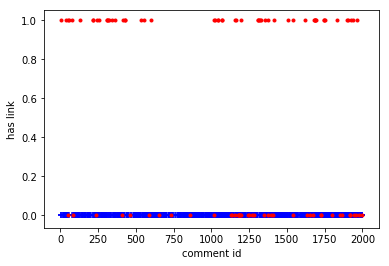

In [36]:
plt.xlabel('comment id')
plt.ylabel('has link')
plt.scatter(df0['id'], df0['has_link'], color='blue', marker='+')
plt.scatter(df1['id'], df1['has_link'], color='red', marker='.')

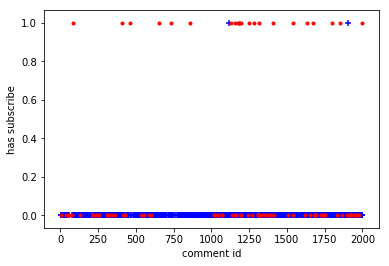

In [37]:
plt.xlabel('comment id')
plt.ylabel('has subscribe')
plt.scatter(df0['id'], df0['has_subscribe'], color='blue', marker='+')
plt.scatter(df1['id'], df1['has_subscribe'], color='red', marker='.')

In [38]:
X = df[['has_link', 'has_subscribe', 'has_email', 'has_phone']]
y = df['is_spam']
X.head()

,has_link,has_subscribe,has_email,has_phone
0,1,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model = SVC(gamma='auto', kernel='linear')
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [41]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [42]:
model.score(x_test, y_test)

0.9608938547486033